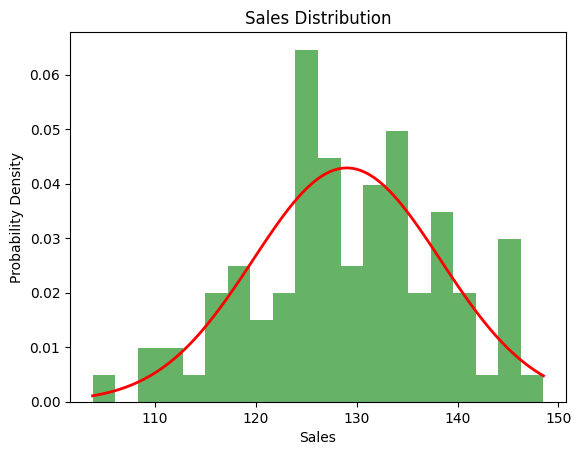

P-value of normality test: 0.6864
Probability of selling less than 120 units: 0.1662
Probability of selling more than 140 units: 0.1186
95% confidence interval for the mean: (127.0537057636764, 130.9701302785319)
T-statistic: 4.0709
P-value: 0.0001
95% confidence interval for the standard deviation: (8.11, 10.90)
P-value for standard deviation test: 0.0154
F-statistic: 15.4521
P-value: 0.0000
Correlation coefficient: -0.1623
Regression equation: Sales = 143.22 + -0.0128 * Advertising Expense
Linear trend: Sales = 153.61 + 0.3398 * Time


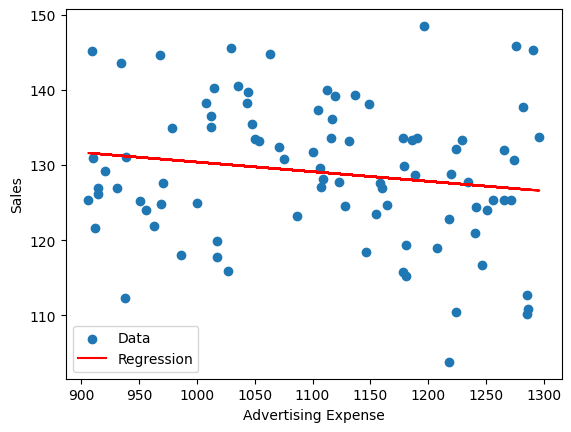

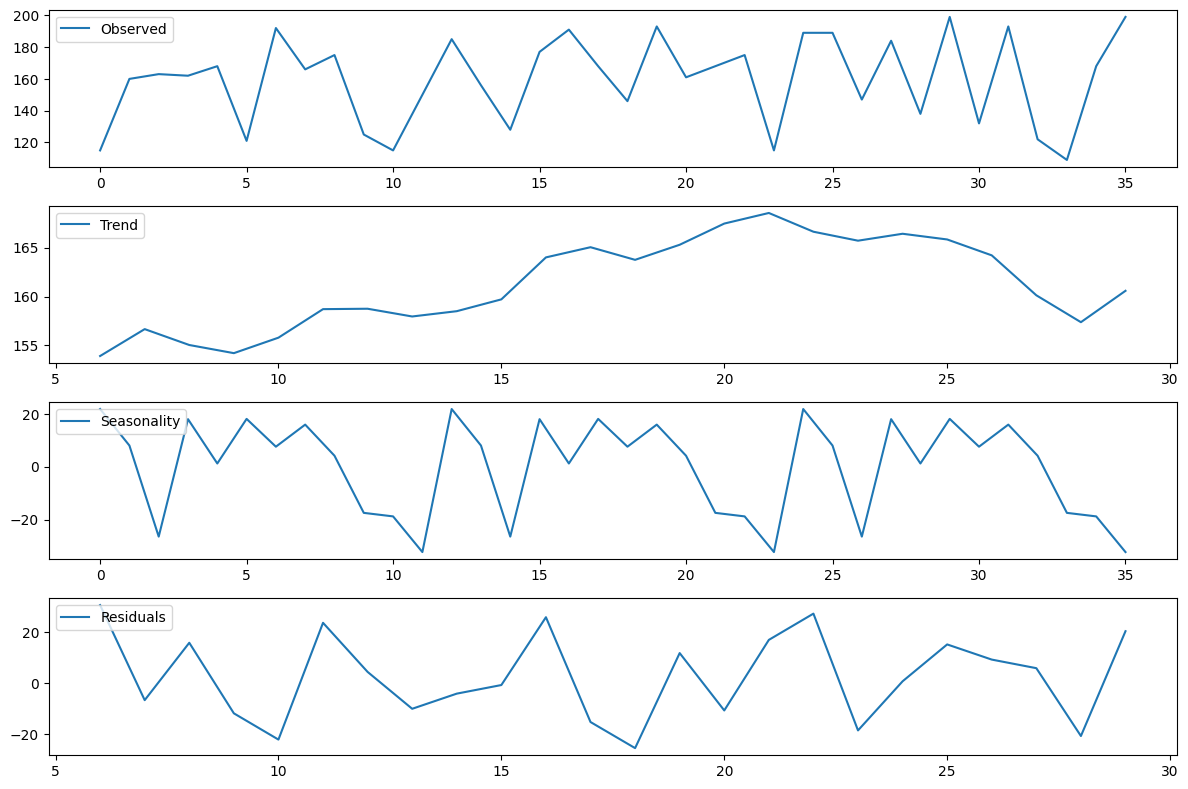

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns

# Configuration for reproducibility
np.random.seed(42)

# 1. Normal distribution and probability calculations
# Generate daily sales data for 90 days
daily_sales = np.random.normal(loc=130, scale=10, size=90)

# Calculate mean and standard deviation
mean = np.mean(daily_sales)
std_dev = np.std(daily_sales)

# Create histogram and normal distribution curve
fig, ax = plt.subplots()
ax.hist(daily_sales, bins=20, density=True, alpha=0.6, color='g')
x = np.linspace(min(daily_sales), max(daily_sales), 100)
y = stats.norm.pdf(x, mean, std_dev)
ax.plot(x, y, 'r', linewidth=2)
ax.set_xlabel('Sales')
ax.set_ylabel('Probability Density')
ax.set_title('Sales Distribution')
plt.show()

# Normality test (Shapiro-Wilk)
_, p_value = stats.shapiro(daily_sales)
# Confirms that sales follow a normal distribution (p > 0.05)
print(f"P-value of normality test: {p_value:.4f}")

# Probability calculations
prob_less_120 = stats.norm.cdf(120, mean, std_dev)  # Probability of low sales
prob_more_140 = 1 - stats.norm.cdf(140, mean, std_dev)  # Probability of high sales

print(f"Probability of selling less than 120 units: {prob_less_120:.4f}")
print(f"Probability of selling more than 140 units: {prob_more_140:.4f}")

# Calculate 95% confidence interval
confidence_interval = stats.t.interval(confidence=0.95, df=len(daily_sales)-1,
                                       loc=np.mean(daily_sales),
                                       scale=stats.sem(daily_sales))
# Average sales fall within a reliable range
print(f"95% confidence interval for the mean: {confidence_interval}")

# 3. Inference about means and hypothesis testing
# One-sample t-test (comparing with previous average of 125 units)
t_stat, p_value = stats.ttest_1samp(daily_sales, 125)
# Confirms that the current average is significantly higher (p < 0.05)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 4. Analysis of standard deviations and related tests
# Calculate confidence interval for standard deviation
chi2_low = stats.chi2.ppf(0.025, df=len(daily_sales)-1)
chi2_high = stats.chi2.ppf(0.975, df=len(daily_sales)-1)
ci_low = np.sqrt((len(daily_sales)-1) * np.var(daily_sales) / chi2_high)
ci_high = np.sqrt((len(daily_sales)-1) * np.var(daily_sales) / chi2_low)
# Variance is within an acceptable range
print(f"95% confidence interval for the standard deviation: ({ci_low:.2f}, {ci_high:.2f})")

# Test for a specific standard deviation
hypothesized_std_dev = 8
chi2_stat = (len(daily_sales) - 1) * np.var(daily_sales) / (hypothesized_std_dev**2)
p_value = 1 - stats.chi2.cdf(chi2_stat, df=len(daily_sales)-1)
# Higher variability in sales than the hypothesis
print(f"P-value for standard deviation test: {p_value:.4f}")

# 5. Analysis of variance (ANOVA)
# Generate sales data for three products
product_a = np.random.normal(loc=130, scale=10, size=30)
product_b = np.random.normal(loc=125, scale=10, size=30)
product_c = np.random.normal(loc=135, scale=10, size=30)

# Perform ANOVA
f_stat, p_value = stats.f_oneway(product_a, product_b, product_c)
# Identifies significant differences between products (p < 0.05)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# 6. Correlation and linear regression
# Generate advertising expenditure data
advertising_expense = np.random.uniform(900, 1300, size=90)

# Calculate correlation coefficient
r, _ = stats.pearsonr(advertising_expense, daily_sales)
# Positive but weak relationship between advertising and sales
print(f"Correlation coefficient: {r:.4f}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(advertising_expense, daily_sales)
plt.scatter(advertising_expense, daily_sales, label='Data')
plt.plot(advertising_expense, intercept + slope * advertising_expense, 'r', label='Regression')
plt.xlabel('Advertising Expense')
plt.ylabel('Sales')
plt.legend()
# Advertising slightly influences sales
print(f"Regression equation: Sales = {intercept:.2f} + {slope:.4f} * Advertising Expense")

# 7. Time series analysis
# Generate monthly sales data for 3 years with trend and seasonality
monthly_sales = np.random.randint(100, 200, size=36)

# Decompose time series
result = seasonal_decompose(monthly_sales, model='additive', period=12)

# Plot components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

# Increasing trend in monthly sales
numerical_time = np.arange(len(monthly_sales))
slope, intercept, r_value, p_value, std_err = stats.linregress(numerical_time, monthly_sales)
print(f"Linear trend: Sales = {intercept:.2f} + {slope:.4f} * Time")
